## Az elhízás következményei 

### 1. Társadalmi hatások

A BMI folyamatos változó, a Kendal tau-t az ordinalis változókkal fogjuk alkalmazni, hogy megértsük a kapcsolatokat.

#### Fontosabb könyvtárak importálása

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kendalltau

import warnings
warnings.filterwarnings('ignore')

C:\Users\erika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\erika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Változók leírása


- BMI_category (Body Mass Index): A válaszadó testtömegindexe, amely egy folyamatos változó, és itt a magyarázott változó (y).
- REGIO_KOD: A válaszadó lakóhelyének regionális kódja, amely területi jellemzőket tartalmaz.
- ISK4_KITOLTO: A válaszadó iskolai végzettsége, amely lehet ordinalis változó, különböző szintű végzettségek csoportosítását tartalmazhatja.
- HH_3_KITOLTO: a válaszadó neme
- ELETKOR_KITOLTO: kitöltő életkora
- INU_1: anyagi helyezet megítélése
- TTIPMSZ:település típusa
- DEG_URB_EU: urbanizáció foka

#### Változók kategóriáinak leírása

ISK4_KITOLTO
-1:missing
1:legfeljebb 8 általános
2:középfokú végzettség érettségi nélkül
3:középfokú végzettség érettségivel
4:felsőfokú végzettség
    
    
HH_3_KITOLTO
1:férfi
2:nő
    
TTIPMSZ
1:Budapest
2:Megyeszékhely
3:város
4:község, falu
    
DEG_URB_EU
-1:missing
1:Nagyváros
2:Város, külváros
3:Vidék
    
INU_1
-9:NK
-8:NT
1:nagyon jó
2:jó
3:megfelelő
4:rossz
5:nagyon rossz


#### Adattábla betöltése

In [2]:
df = pd.read_excel("BMI_megye.xlsx")

In [3]:
df

,SORSZAM,WEIGHT,KITOLTES_MODJA,TERUL,TEL_NEV,MEGYE_KOD,MEGYE_NEV,REGIO_KOD,REGIO_NEV,HH1_CODED,...,DOH1_b3,GYERMEK_KORCSOP3,GYERMEK_KORCSOP4,GYERMEK_KORCSOP4_KERD,GYERMEK_KORCSOP8,GY_BMI,GY_JARAS,GY_KORL_TEV,Szamitott_BMI,BMI_category
0,6522,2110,2,29531,Vésztő,4,Békés,70,Dél-Alföld,4,...,0.0,1.0,3.0,4,1.0,NaN,-1.0,-1.0,24.034610,3
1,4452,1852,1,24299,Budapest 13. ker.,1,főváros,11,Budapest,4,...,NaN,1.0,1.0,1,1.0,15.717456,1.0,-1.0,36.139456,5
2,11191,3000,2,13426,Kemenesmihályfa,18,Vas,30,Nyugat-Dunántúl,4,...,NaN,1.0,1.0,1,1.0,16.460905,-1.0,1.0,29.000595,4
3,6804,791,2,4446,Tiszakerecseny,15,Szabolcs-Szatmár-Bereg,60,Észak-Alföld,4,...,NaN,1.0,NaN,4,1.0,NaN,-1.0,-1.0,23.120624,3
4,7345,2034,2,24013,Diósd,13,Pest,12,Pest,1,...,NaN,1.0,1.0,1,1.0,NaN,-1.0,-1.0,29.068773,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2856,2251,1,15130,Debrecen,9,Hajdú-Bihar,60,Észak-Alföld,3,...,NaN,NaN,1.0,4,NaN,NaN,-1.0,-1.0,20.061728,3
96,3827,1860,2,33677,Mosonszentmiklós,8,Győr-Moson-Sopron,30,Nyugat-Dunántúl,2,...,NaN,1.0,1.0,1,1.0,NaN,-1.0,1.0,32.421875,5
97,8907,1140,1,17695,Tiszasüly,16,Jász-Nagykun-Szolnok,60,Észak-Alföld,4,...,NaN,1.0,1.0,4,7.0,-2.000000,-1.0,-1.0,22.491349,3
98,6339,2758,1,11396,Pilisszentiván,13,Pest,12,Pest,2,...,NaN,NaN,1.0,4,1.0,NaN,2.0,-1.0,37.182261,5


#### Hiányzó értékek ellenőrzése

In [8]:
df[['HH_3_KITOLTO',"ELETKOR_KITOLTO","INU_1","TTIPMSZ","DEG_URB_EU","ISK4_KITOLTO"]].isnull().sum()

HH_3_KITOLTO       0
ELETKOR_KITOLTO    0
INU_1              0
TTIPMSZ            0
DEG_URB_EU         0
ISK4_KITOLTO       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 649 entries, SORSZAM to BMI_category
dtypes: float64(383), int64(261), object(5)
memory usage: 507.2+ KB


In [7]:
missing_val_1 = df[df['BMI_category'].isna() | df['REGIO_KOD'].isna() | df['HH_3_KITOLTO'].isna() | df['ELETKOR_KITOLTO'].isna() | df['INU_1'].isna() ]

In [8]:
missing_val_1 

,SORSZAM,WEIGHT,KITOLTES_MODJA,TERUL,TEL_NEV,MEGYE_KOD,MEGYE_NEV,REGIO_KOD,REGIO_NEV,HH1_CODED,...,DOH1_b3,GYERMEK_KORCSOP3,GYERMEK_KORCSOP4,GYERMEK_KORCSOP4_KERD,GYERMEK_KORCSOP8,GY_BMI,GY_JARAS,GY_KORL_TEV,Szamitott_BMI,BMI_category


In [9]:
missing_val_2 = df[df['TTIPMSZ'].isna() | df['DEG_URB_EU'].isna() | df['ISK4_KITOLTO'].isna()]

In [10]:
missing_val_2

,SORSZAM,WEIGHT,KITOLTES_MODJA,TERUL,TEL_NEV,MEGYE_KOD,MEGYE_NEV,REGIO_KOD,REGIO_NEV,HH1_CODED,...,DOH1_b3,GYERMEK_KORCSOP3,GYERMEK_KORCSOP4,GYERMEK_KORCSOP4_KERD,GYERMEK_KORCSOP8,GY_BMI,GY_JARAS,GY_KORL_TEV,Szamitott_BMI,BMI_category


### Kendall Tau elemzés

In [10]:
import pandas as pd
from scipy.stats import kendalltau


# A minta adatokat DataFrame-be töltjük

df = pd.read_excel("BMI_megye.xlsx")
# Változók kiválasztása
variables = [
    'REGIO_KOD',  #(ez nem is kell)
    'HH_3_KITOLTO',# a válaszadó neme
    "ELETKOR_KITOLTO",# kitöltő életkora
    "INU_1", # anyagi helyezet megítélése
    "TTIPMSZ",   # település típusa
    "DEG_URB_EU",  # urbanizáció foka
    "ISK4_KITOLTO"  # a válaszadó iskolai végzettsége
]

# Kendal tau korreláció kiszámítása
correlations = {}

for var in variables:
    tau, p_value = kendalltau(df['BMI_category'], df[var])
    correlations[var] = {'Kendall_tau': tau, 'P_value': p_value}

# Eredmények megjelenítése
correlations_df = pd.DataFrame(correlations).T
print(correlations_df)


                 Kendall_tau   P_value
REGIO_KOD          -0.046800  0.562087
HH_3_KITOLTO        0.076005  0.413140
ELETKOR_KITOLTO     0.074290  0.333699
INU_1               0.050694  0.562213
TTIPMSZ             0.106096  0.214041
DEG_URB_EU         -0.097872  0.264396
ISK4_KITOLTO       -0.055618  0.512958


#### Elemzés, eredmények

### Kereszttábla elemzések

Kitöltő neme szerint

In [18]:

# Kereszttábla
crosstab = pd.crosstab(df['BMI_category'], df['HH_3_KITOLTO'])


# Sorok összegzésének hozzáadása
crosstab['Total_Rows'] = crosstab.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab.loc['Total_Columns'] = crosstab.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab)


Oszlopok és sorok összegével bővített tábla:
HH_3_KITOLTO    1   2  Total_Rows
BMI_category                     
2               1   1           2
3              20  19          39
4              10  13          23
5              12  17          29
6               3   4           7
Total_Columns  46  54         100


In [17]:
# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")
print(f"Szabadságfok: {dof}")
print("Várt értékek:\n", expected)


Chi-négyzet statisztika: 0.7869076910643078
P-érték: 0.999943301209925
Szabadságfok: 10
Várt értékek:
 [[  0.92   1.08   2.  ]
 [ 17.94  21.06  39.  ]
 [ 10.58  12.42  23.  ]
 [ 13.34  15.66  29.  ]
 [  3.22   3.78   7.  ]
 [ 46.    54.   100.  ]]


In [24]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 0.7869076910643078
P-érték: 0.999943301209925


Hőtérkép

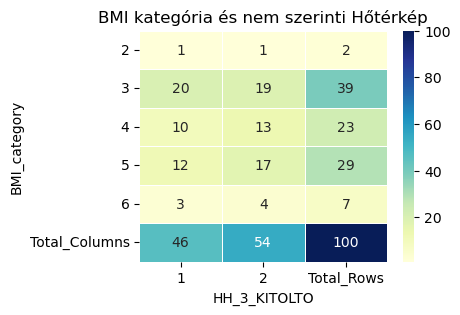

In [73]:

# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és nem szerinti Hőtérkép')
plt.xlabel('HH_3_KITOLTO')
plt.ylabel('BMI_category')
plt.show()

Iskolai végzettség szerint

ISK4_KITOLTO
-1:missing
1:legfeljebb 8 általános
2:középfokú végzettség érettségi nélkül
3:középfokú végzettség érettségivel
4:felsőfokú végzettség

In [27]:

# Kereszttábla
crosstab_1 = pd.crosstab(df['BMI_category'], df['ISK4_KITOLTO'])
print(crosstab_1)
# Sorok összegzésének hozzáadása
crosstab_1['Total_Rows'] = crosstab_1.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_1.loc['Total_Columns'] = crosstab_1.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_1)

ISK4_KITOLTO  1  2   3   4
BMI_category              
2             0  0   1   1
3             9  8  12  10
4             6  2   7   8
5             4  9  12   4
6             2  2   1   2

Oszlopok és sorok összegével bővített tábla:
ISK4_KITOLTO    1   2   3   4  Total_Rows
BMI_category                             
2               0   0   1   1           2
3               9   8  12  10          39
4               6   2   7   8          23
5               4   9  12   4          29
6               2   2   1   2           7
Total_Columns  21  21  33  25         100


Chi négyzet elemzés

In [28]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_1)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 9.875222419236128
P-érték: 0.9703784603930131


Hőtérkép

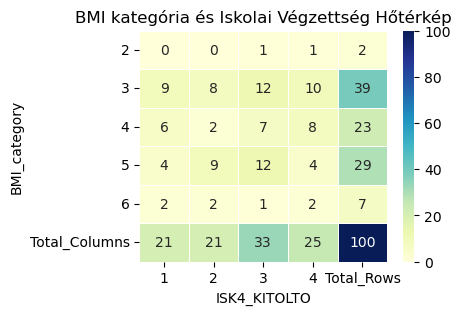

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_1, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és Iskolai Végzettség Hőtérkép')
plt.xlabel('ISK4_KITOLTO')
plt.ylabel('BMI_category')
plt.show()

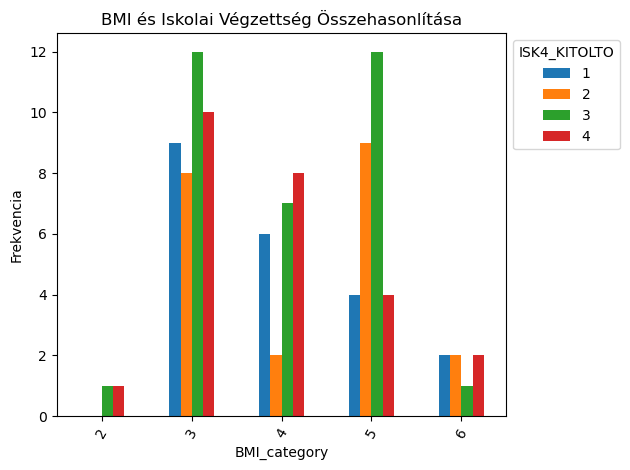

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keresztelt tábla oszlopdiagramként történő ábrázolása
crosstab_1.plot(kind='bar', stacked=False)

plt.title('BMI és Iskolai Végzettség Összehasonlítása')
plt.xlabel('BMI_category')
plt.ylabel('Frekvencia')
plt.xticks(rotation=60)
plt.legend(title='ISK4_KITOLTO', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

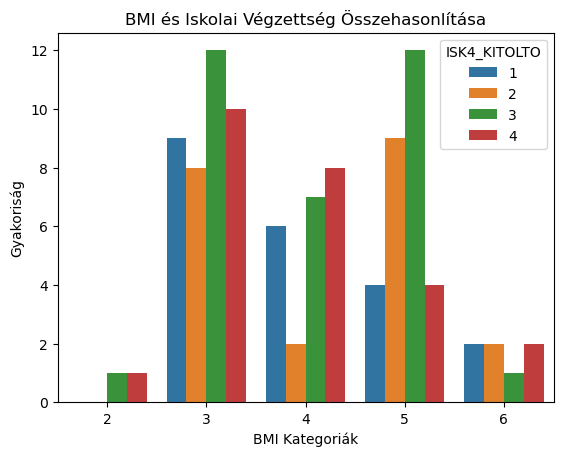

In [51]:
sns.countplot(x='BMI_category', hue='ISK4_KITOLTO', data=df)
plt.title('BMI és Iskolai Végzettség Összehasonlítása')
plt.xlabel('BMI Kategoriák')
plt.ylabel('Gyakoriság')
plt.show()

Pivot tábla elemzés BMI kategória, iskolai végzettség és nemek szerint

In [80]:
# Pivot tábla a nemek és iskolai végzettség szerint
crosstab_tr = df.pivot_table(index='BMI_category', columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_tr['Total_Rows'] = crosstab_tr.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_tr.loc['Total_Columns'] = crosstab_tr.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_tr)

ISK4_KITOLTO  1     2     3     4   
HH_3_KITOLTO  1  2  1  2  1  2  1  2
BMI_category                        
2             0  0  0  0  0  1  1  0
3             7  2  2  6  6  6  5  5
4             2  4  1  1  2  5  5  3
5             1  3  4  5  4  8  3  1
6             1  1  0  2  1  0  1  1

Oszlopok és sorok összegével bővített tábla:
ISK4_KITOLTO    1      2       3       4     Total_Rows
HH_3_KITOLTO    1   2  1   2   1   2   1   2           
BMI_category                                           
2               0   0  0   0   0   1   1   0          2
3               7   2  2   6   6   6   5   5         39
4               2   4  1   1   2   5   5   3         23
5               1   3  4   5   4   8   3   1         29
6               1   1  0   2   1   0   1   1          7
Total_Columns  11  10  7  14  13  20  15  10        100


In [ ]:
# Pivot tábla a nemek és iskolai végzettség szerint
crosstab_tr = df.pivot_table(index='BMI_category', columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_tr['Total_Rows'] = crosstab_tr.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_tr.loc['Total_Columns'] = crosstab_tr.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_tr)

ALACSONY HDI szerint

In [9]:
# Csak a megadott régiókat tartalmazó adatok szűrése
filtered_df = df[df['REGIO_KOD'].isin([50, 20, 40, 30, 60])]

# Pivot tábla a nemek és iskolai végzettség szerint a szűrt adatokkal
crosstab_tr = filtered_df.pivot_table(
    index='BMI_category',
    columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'],
    aggfunc='size',
    fill_value=0
)

# Sorok összegzésének hozzáadása
crosstab_tr['Total_Rows'] = crosstab_tr.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_tr.loc['Total_Columns'] = crosstab_tr.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_tr)


Oszlopok és sorok összegével bővített tábla:
ISK4_KITOLTO   1     2      3       4    Total_Rows
HH_3_KITOLTO   1  2  1  2   1   2   1  2           
BMI_category                                       
2              0  0  0  0   0   1   1  0          2
3              4  2  2  2   3   3   2  3         21
4              1  3  0  0   2   3   3  3         15
5              0  2  3  2   4   6   3  0         20
6              1  1  0  1   1   0   1  1          6
Total_Columns  6  8  5  5  10  13  10  7         64


In [10]:
# REGIO szintű eloszlás BMI kategória szerint
pivot_regio = filtered_df.pivot_table(
    index='REGIO',
    columns='BMI_category',
    aggfunc='size',
    fill_value=0
)

print("\nBMI kategóriák eloszlása régiónként:")
print(pivot_regio)



BMI kategóriák eloszlása régiónként:
BMI_category  2  3  4  5  6
REGIO                      
11            0  3  3  2  2
12            1  5  3  2  1
20            0  2  1  4  0
30            0  4  1  2  1
40            0  4  2  5  0
50            1  0  2  1  1
60            0  2  2  1  0
70            0  1  1  3  1


In [11]:
# Pivot tábla REGIO + BMI_category szerint, oszlopokban ISK4_KITOLTO és HH_3_KITOLTO
crosstab_full = filtered_df.pivot_table(
    index=['REGIO', 'BMI_category'],
    columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'],
    aggfunc='size',
    fill_value=0
)

print("\nREGIO, BMI, ISK4_KITOLTO és HH_3_KITOLTO szerinti pivot tábla:")
print(crosstab_full)



REGIO, BMI, ISK4_KITOLTO és HH_3_KITOLTO szerinti pivot tábla:
ISK4_KITOLTO        1     2     3     4   
HH_3_KITOLTO        1  2  1  2  1  2  1  2
REGIO BMI_category                        
11    3             0  0  0  1  0  2  0  0
      4             0  0  0  0  1  1  1  0
      5             0  0  0  0  2  0  0  0
      6             0  0  0  1  0  0  0  1
12    2             0  0  0  0  0  1  0  0
      3             2  1  0  0  0  1  1  0
      4             0  1  0  0  0  0  1  1
      5             0  0  1  0  0  1  0  0
      6             0  0  0  0  1  0  0  0
20    3             1  1  0  0  0  0  0  0
      4             0  0  0  0  0  0  0  1
      5             0  1  0  0  2  0  1  0
30    3             0  0  0  0  3  0  0  1
      4             0  0  0  0  0  1  0  0
      5             0  0  0  0  0  1  1  0
      6             1  0  0  0  0  0  0  0
40    3             1  0  0  0  0  0  1  2
      4             0  1  0  0  1  0  0  0
      5             0  1  1  0  0

In [6]:
print(filtered_df['REGIO_KOD'].unique())

[30 60 20 50 40]


In [8]:
# Pivot szűrés nélkül
full_pivot = df.pivot_table(
    index='BMI_category',
    columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'],
    aggfunc='size',
    fill_value=0
)
print("Pivot szűrés nélkül:")
print(full_pivot.sum().sum())  # összes rekord száma

# Pivot szűréssel
filtered_pivot = filtered_df.pivot_table(
    index='BMI_category',
    columns=['ISK4_KITOLTO', 'HH_3_KITOLTO'],
    aggfunc='size',
    fill_value=0
)
print("Pivot szűréssel:")
print(filtered_pivot.sum().sum())  # szűrt rekordok száma


Pivot szűrés nélkül:
100
Pivot szűréssel:
64


Anyagi helyzet megítélése szerint

INU_1
-9:NK
-8:NT
1:nagyon jó
2:jó
3:megfelelő
4:rossz
5:nagyon rossz

In [12]:

# Kereszttábla
crosstab_INU = pd.crosstab(df['BMI_category'], df['INU_1'])

# Sorok összegzésének hozzáadása
crosstab_INU['Total_Rows'] = crosstab_INU.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_INU.loc['Total_Columns'] = crosstab_INU.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_INU)



Oszlopok és sorok összegével bővített tábla:
INU_1          -8  1   2   3   4  5  Total_Rows
BMI_category                                   
2               0  0   1   0   1  0           2
3               0  2  12  18   7  0          39
4               0  1   9  10   3  0          23
5               0  0   2  22   4  1          29
6               1  0   3   3   0  0           7
Total_Columns   1  3  27  53  15  1         100


Chi négyzet elemzés

In [29]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_INU)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 32.23575946723807
P-érték: 0.356644362665798


Hőtérkép

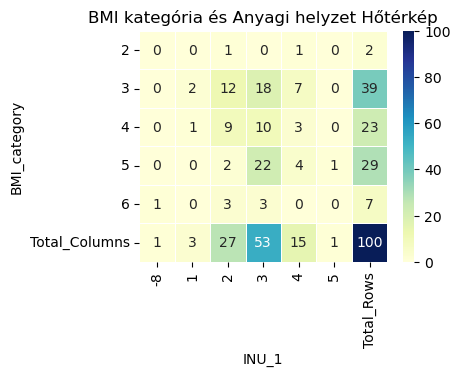

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_INU, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és Anyagi helyzet Hőtérkép')
plt.xlabel('INU_1')
plt.ylabel('BMI_category')
plt.show()

In [16]:
# Pivot tábla a BMI kategória,iskolai végzettség és anyagi helyzet szerint
crosstab_INU_ISK = df.pivot_table(index='BMI_category', columns=['ISK4_KITOLTO', 'INU_1'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_INU_ISK['Total_Rows'] = crosstab_INU_ISK.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_INU_ISK.loc['Total_Columns'] = crosstab_INU_ISK.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_INU_ISK)


Oszlopok és sorok összegével bővített tábla:
ISK4_KITOLTO   1            2               3             4        Total_Rows
INU_1         -8  2   3  4  1  2   3  4  5  1   2   3  4  2   3  4           
BMI_category                                                                 
2              0  0   0  0  0  0   0  0  0  0   0   0  1  1   0  0          2
3              0  4   4  1  2  0   4  2  0  0   5   6  1  3   4  3         39
4              0  2   3  1  0  1   1  0  0  1   4   1  1  2   5  1         23
5              0  1   3  0  0  0   7  1  1  0   1   8  3  0   4  0         29
6              1  0   1  0  0  1   1  0  0  0   1   0  0  1   1  0          7
Total_Columns  1  7  11  2  2  2  13  3  1  1  11  15  6  7  14  4        100


Urbanizáció foka szerint

DEG_URB_EU
-1:missing
1:Nagyváros
2:Város, külváros
3:Vidék

In [17]:

# Kereszttábla
crosstab_URB = pd.crosstab(df['BMI_category'], df['DEG_URB_EU'])
#print(crosstab_3)

# Sorok összegzésének hozzáadása
crosstab_URB['Total_Rows'] = crosstab_URB.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_URB.loc['Total_Columns'] = crosstab_URB.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_URB)


Oszlopok és sorok összegével bővített tábla:
DEG_URB_EU      1   2   3  Total_Rows
BMI_category                         
2               1   1   0           2
3               9  12  18          39
4               7   8   8          23
5               8  14   7          29
6               2   3   2           7
Total_Columns  27  38  35         100


Hőtérkép

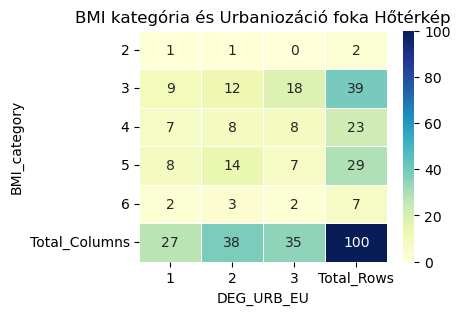

In [58]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_URB, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és Urbaniozáció foka Hőtérkép')
plt.xlabel('DEG_URB_EU')
plt.ylabel('BMI_category')
plt.show()

 Pivot tábla a BMI kategória,iskolai végzettség és anyagi helyzet szerint

In [21]:

crosstab_INU_ISK = df.pivot_table(index='BMI_category', columns=['ISK4_KITOLTO', 'DEG_URB_EU'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_INU_ISK['Total_Rows'] = crosstab_INU_ISK.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_INU_ISK.loc['Total_Columns'] = crosstab_INU_ISK.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_INU_ISK)


Oszlopok és sorok összegével bővített tábla:
ISK4_KITOLTO   1        2         3         4       Total_Rows
DEG_URB_EU     1  2  3  1  2   3  1   2  3  1  2  3           
BMI_category                                                  
2              0  0  0  0  0   0  1   0  0  0  1  0          2
3              1  3  5  2  2   4  3   4  5  3  3  4         39
4              3  1  2  0  1   1  3   3  1  1  3  4         23
5              1  3  0  3  2   4  2   8  2  2  1  1         29
6              0  2  0  1  0   1  0   0  1  1  1  0          7
Total_Columns  5  9  7  6  5  10  9  15  9  7  9  9        100


Település típusa szerint

TTIPMSZ
1:Budapest
2:Megyeszékhely
3:város
4:község, falu

In [40]:

# Kereszttábla
crosstab_4 = pd.crosstab(df['BMI_category'], df['TTIPMSZ'])
print(crosstab_4)

TTIPMSZ        1  2   3   4
BMI_category               
2              0  1   0   1
3             10  6  14   9
4              3  5   9   6
5              5  4   9  11
6              0  1   5   1


In [41]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_4)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 10.566380244828837
P-érték: 0.5663989244970373


### 2. Gazdasági hatások

Változók

- FEOR_CODED: A válaszadó foglalkozása (FEOR-kód), amely a válaszadó munkaerőpiaci helyzetét jellemzi.
- ISK4_KITOLTO: A válaszadó iskolai végzettsége, amely lehet ordinalis változó, különböző szintű végzettségek csoportosítását tartalmazhatja.
- MAINSTAT_EU: A válaszadó gazdasági aktivitása (pl. munkavállaló, munkanélküli, stb.).
- HH_7_KITOLTO: A válaszadó gazdasági aktivitása, amelyet az adatkitöltő szintjén rögzítenek.
- FT_PT_EU: A válaszadó főállású munkavállalóként teljes vagy részmunkaidőben dolgozik-e.
- JOBSTAT_EU: A válaszadó foglalkozási státusza főállásban (pl. alkalmazott, vezető, stb.).
- AW2: Az elmúlt 12 HÓNAPBAN összesen hány napot nem dolgozott a munkahelyén saját egészségi problémái miatt?
- AWU_1N: A. Az elmúlt 1 HÓNAPBAN összesen hány napon fordult elő, hogy hiányzott a munkahelyéről saját egészségi problémái miatt?
- AWU_2: Az elmúlt 1 HÓNAPBAN hányszor fordult elő Önnel, hogy valamely egészségi problémája gondot okozott Önnek, de ennek ellenére elvégezte a fizetett munkáját?
- AW1_EU:Munkahelyi hiányzás az elmúlt 12 hónapban saját egészségi probléma miatt (teljes mintára)

Keresztábla-FEOR_CODED

In [36]:
# Kereszttábla
crosstab_FEOR = pd.crosstab(df['BMI_category'], df['FEOR_CODED'])
#print(crosstab_FEOR)

crosstab_FEOR['Total_Rows'] = crosstab_FEOR.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_FEOR.loc['Total_Columns'] = crosstab_FEOR.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_FEOR)


Oszlopok és sorok összegével bővített tábla:
FEOR_CODED     -1  13  14  21  22  24  25  26  27  31  ...  73  75  81  82  \
BMI_category                                           ...                   
2               0   1   0   0   1   0   0   0   0   0  ...   0   0   0   0   
3               3   1   0   4   3   2   0   0   0   1  ...   3   2   0   1   
4               1   0   1   0   1   2   0   0   0   0  ...   0   0   1   0   
5               2   0   0   0   1   1   2   1   1   0  ...   2   3   0   1   
6               1   1   0   0   0   0   0   0   0   0  ...   1   0   0   0   
Total_Columns   7   3   1   4   6   5   2   1   1   1  ...   6   5   1   2   

FEOR_CODED     83  84  91  92  93  Total_Rows  
BMI_category                                   
2               0   0   0   0   0           2  
3               1   2   0   2   0          39  
4               2   0   0   1   0          23  
5               1   1   0   0   2          29  
6               0   0   1   0   0        

In [42]:
df['FEOR_CODED'].dtype

dtype('int64')

In [38]:
crosstab_FEOR = crosstab_FEOR.to_excel("FEOR_BMI.xlsx")

A válaszadó gazdasági aktivitása és BMI kategória

MAINSTAT_EU

-1	missing		
10	foglalkoztatott		
20	munkanélküli		
30	nyugdíjas		
40	nem dolgozik hosszantartó egészségi probléma miatt		
50	tanuló		
60	háztartási feladatokat lát el		
80	egyéb		


In [46]:
# Kereszttábla
crosstab_GAZD = pd.crosstab(df['BMI_category'], df['MAINSTAT_EU'])
#print(crosstab_FEOR)

crosstab_GAZD['Total_Rows'] = crosstab_GAZD.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_GAZD.loc['Total_Columns'] = crosstab_GAZD.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_GAZD)


Oszlopok és sorok összegével bővített tábla:
MAINSTAT_EU    10  20  30  40  50  60  80  Total_Rows
BMI_category                                         
2               0   0   2   0   0   0   0           2
3              19   0  15   1   1   2   1          39
4              13   2   5   1   0   1   1          23
5               9   1  13   2   3   1   0          29
6               3   0   2   0   1   1   0           7
Total_Columns  44   3  37   4   5   5   2         100


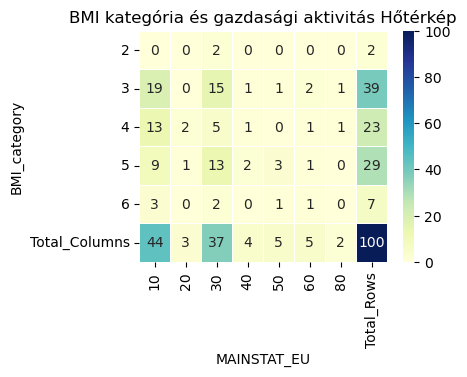

In [56]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_GAZD, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és gazdasági aktivitás Hőtérkép')
plt.xlabel('MAINSTAT_EU')
plt.ylabel('BMI_category')
plt.show()

In [47]:

crosstab_FEOR_FOGL = df.pivot_table(index='BMI_category', columns=['MAINSTAT_EU', 'FEOR_CODED'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_FEOR_FOGL['Total_Rows'] = crosstab_FEOR_FOGL.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_FEOR_FOGL.loc['Total_Columns'] = crosstab_FEOR_FOGL.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_FEOR_FOGL)


Oszlopok és sorok összegével bővített tábla:
MAINSTAT_EU   10                             ... 50       60          80     \
FEOR_CODED    -1 21 22 24 25 31 33 36 41 42  ... 42 51 73 51 61 72 73 75 81   
BMI_category                                 ...                              
2              0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0   
3              1  3  3  1  0  1  0  0  1  1  ...  0  0  0  1  0  0  1  1  0   
4              0  0  0  2  0  0  1  3  1  0  ...  0  0  0  0  1  0  0  0  1   
5              2  0  0  0  1  0  0  0  1  0  ...  1  0  1  0  0  1  0  0  0   
6              1  0  0  0  0  0  0  1  0  0  ...  0  1  0  0  0  0  1  0  0   
Total_Columns  4  3  3  3  1  1  1  4  3  1  ...  1  1  1  1  1  1  2  1  1   

MAINSTAT_EU   Total_Rows  
FEOR_CODED                
BMI_category              
2                      2  
3                     39  
4                     23  
5                     29  
6                      7  
Total_Columns        100  

In [50]:
crosstab_FEOR_FOGL = crosstab_FEOR_FOGL.to_excel("FEOR_GAZD_BMI.xlsx")

In [52]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_GAZD)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 19.860471254774104
P-érték: 0.9813742434204904


JOBSTAT_EU: A válaszadó foglalkozási státusza főállásban 

-2	nem vonatkozik rá a kérdés		
-1	missing		
11	vállalkozó beosztottakkal		
12	vállalkozó beosztottak nélkül		
20	alkalmazott		
30	háztartásban dolgozik (nem fizetett)		


In [55]:
# Kereszttábla
crosstab_JOB= pd.crosstab(df['BMI_category'], df['JOBSTAT_EU'])
#print(crosstab_FEOR)

crosstab_JOB['Total_Rows'] = crosstab_JOB.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_JOB.loc['Total_Columns'] = crosstab_JOB.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_JOB)


Oszlopok és sorok összegével bővített tábla:
JOBSTAT_EU     -2  11  12  20  Total_Rows
BMI_category                             
2               1   0   0   1           2
3              25   1   0  13          39
4              16   0   0   7          23
5              17   0   1  11          29
6               5   0   0   2           7
Total_Columns  64   1   1  34         100


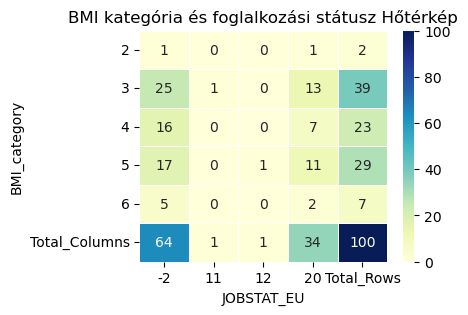

In [60]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_JOB, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és foglalkozási státusz Hőtérkép')
plt.xlabel('JOBSTAT_EU')
plt.ylabel('BMI_category')
plt.show()

In [61]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_JOB)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 4.81062318105653
P-érték: 0.9997949250381843


FT_PT_EU: A válaszadó főállású munkavállalóként teljes vagy részmunkaidőben dolgozik-e.

-2	nem vonatkozik rá a kérdés	
-1	missing	
1	teljes munkaidős	
2	részmunkaidős	


In [5]:
# Kereszttábla
crosstab_FT= pd.crosstab(df['BMI_category'], df['FT_PT_EU'])
#print(crosstab_FEOR)

crosstab_FT['Total_Rows'] = crosstab_FT.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_FT.loc['Total_Columns'] = crosstab_FT.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_FT)


Oszlopok és sorok összegével bővített tábla:
FT_PT_EU       -2   1  2  Total_Rows
BMI_category                        
2               1   1  0           2
3              23  16  0          39
4              12   9  2          23
5              14  14  1          29
6               2   3  2           7
Total_Columns  52  43  5         100


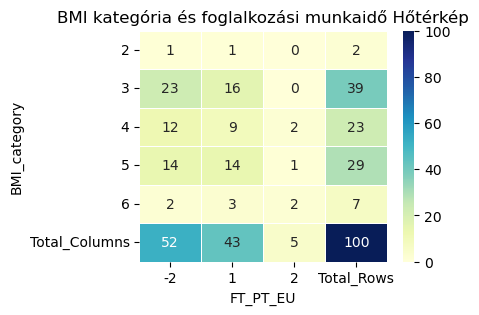

In [6]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_FT, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és foglalkozási munkaidő Hőtérkép')
plt.xlabel('FT_PT_EU')
plt.ylabel('BMI_category')
plt.show()

In [7]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_FT)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 12.105213169231696
P-érték: 0.6710483792917924


•	AW2: Az elmúlt 12 HÓNAPBAN összesen hány napot nem dolgozott a munkahelyén saját egészségi problémái miatt?

In [9]:
df["AW2"].isnull().sum()

88

In [4]:
# Kereszttábla
crosstab_AW2= pd.crosstab(df['BMI_category'], df['AW2'])
#print(crosstab_FEOR)

crosstab_AW2['Total_Rows'] = crosstab_AW2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_AW2.loc['Total_Columns'] = crosstab_AW2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_AW2)


Oszlopok és sorok összegével bővített tábla:
AW2            2.0  4.0  5.0  6.0  10.0  40.0  56.0  365.0  Total_Rows
BMI_category                                                          
3                1    0    2    1     1     0     0      0           5
4                1    1    0    0     1     0     0      0           3
5                0    1    0    0     0     1     1      1           4
Total_Columns    2    2    2    1     2     1     1      1          12


In [13]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_AW2)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 14.100000000000001
P-érték: 0.9443594587361223



AWU_1N: A. Az elmúlt 1 HÓNAPBAN összesen hány napon fordult elő, hogy hiányzott a munkahelyéről saját egészségi problémái miatt?


In [10]:
df["AWU_1N"].isnull().sum()

89

In [11]:
# Kereszttábla
crosstab_AWU_1N= pd.crosstab(df['BMI_category'], df['AWU_1N'])
#print(crosstab_FEOR)

crosstab_AWU_1N['Total_Rows'] = crosstab_AWU_1N.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_AWU_1N.loc['Total_Columns'] = crosstab_AWU_1N.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_AWU_1N)


Oszlopok és sorok összegével bővített tábla:
AWU_1N         0.0  1.0  3.0  8.0  14.0  20.0  Total_Rows
BMI_category                                             
3                1    0    0    0     0     1           2
4                1    0    0    0     1     0           2
5                4    1    1    1     0     0           7
Total_Columns    6    1    1    1     1     1          11


AWU_2: Az elmúlt 1 HÓNAPBAN hányszor fordult elő Önnel, hogy valamely egészségi problémája gondot okozott Önnek, de ennek ellenére elvégezte a fizetett munkáját?

AWU_2: Az elmúlt 1 HÓNAPBAN hányszor fordult elő Önnel, hogy valamely egészségi problémája gondot okozott Önnek, de ennek ellenére elvégezte a fizetett munkáját

In [11]:
df["AWU_2"].isnull().sum()

56

In [12]:
# Kereszttábla
crosstab_AWU_2= pd.crosstab(df['BMI_category'], df['AWU_2'])
#print(crosstab_FEOR)

crosstab_AWU_2['Total_Rows'] = crosstab_AWU_2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_AWU_2.loc['Total_Columns'] = crosstab_AWU_2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_AWU_2)


Oszlopok és sorok összegével bővített tábla:
AWU_2          -9.0  -8.0   0.0   1.0   2.0   5.0   6.0   Total_Rows
BMI_category                                                        
2                 0     0     1     0     0     0     0            1
3                 1     0    16     1     1     0     0           19
4                 0     1     6     0     0     1     1            9
5                 0     2    10     0     0     0     0           12
6                 0     0     2     1     0     0     0            3
Total_Columns     1     3    35     2     1     1     1           44


AW1_EU:Munkahelyi hiányzás az elmúlt 12 hónapban saját egészségi probléma miatt (teljes mintára)

In [ ]:
df["AW1_EU"].isnull().sum()

In [13]:
# Kereszttábla
crosstab_AW1_EU= pd.crosstab(df['BMI_category'], df['AW1_EU'])
#print(crosstab_FEOR)

crosstab_AW1_EU['Total_Rows'] = crosstab_AW1_EU.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_AW1_EU.loc['Total_Columns'] = crosstab_AW1_EU.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_AW1_EU)


Oszlopok és sorok összegével bővített tábla:
AW1_EU         -2  -1   1   2  Total_Rows
BMI_category                             
2               2   0   0   0           2
3              21   0   7  11          39
4              11   0   4   8          23
5              22   1   2   4          29
6               5   0   1   1           7
Total_Columns  61   1  14  24         100


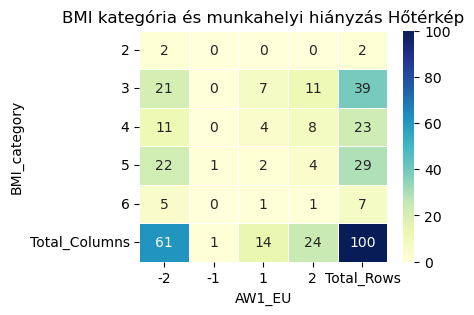

In [14]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_AW1_EU, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és munkahelyi hiányzás Hőtérkép')
plt.xlabel('AW1_EU')
plt.ylabel('BMI_category')
plt.show()

#### gazdasági aktivitás, hiányzás, anyagi helyezet, BMI kategória


In [16]:
crosstab_GAZD = df.pivot_table(index='BMI_category', columns=['AW1_EU', 'MAINSTAT_EU', 'INU_1'], aggfunc='size', fill_value=0)
#print(crosstab_tr)

# Sorok összegzésének hozzáadása
crosstab_GAZD['Total_Rows'] = crosstab_GAZD.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_GAZD.loc['Total_Columns'] = crosstab_GAZD.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_GAZD)


Oszlopok és sorok összegével bővített tábla:
AW1_EU        -2                               ...  2                          \
MAINSTAT_EU   10              20 30        40  ... 10    30    40 50 60    80   
INU_1          1  2   3  4  5  2  2   3  4  2  ...  3  4  2  3  3 -8  3  4  3   
BMI_category                                   ...                              
2              0  0   0  0  0  0  1   0  1  0  ...  0  0  0  0  0  0  0  0  0   
3              1  2   6  3  0  0  1   2  3  1  ...  1  0  1  4  0  0  1  0  0   
4              0  2   5  0  0  2  0   1  0  1  ...  2  2  1  1  0  0  0  0  1   
5              0  1   3  0  1  0  1  10  2  0  ...  2  0  0  0  1  0  0  1  0   
6              0  1   2  0  0  0  1   1  0  0  ...  0  0  0  0  0  1  0  0  0   
Total_Columns  1  6  16  3  1  2  4  14  6  2  ...  5  2  2  5  1  1  1  1  1   

AW1_EU        Total_Rows  
MAINSTAT_EU               
INU_1                     
BMI_category              
2                      2  
3       

In [17]:
crosstab_GAZD = crosstab_GAZD.to_excel("GAZD_BMI.xlsx")

#### 3. Egészségügyi hatások

- HS1	107	Milyen az Ön egészsége általában?
- HSU_1	108	Hogyan változott az Ön egészsége az elmúlt 1 évben?
- HSU_2	109	Véleménye szerint Ön mennyit tehet az egészségéért?
- HS2	110	Van-e Önnek hosszantartó betegsége vagy egészségi problémája?


HS1	-9	NK
	-8	NT
	1	nagyon jó
	2	jó
	3	kielégítő
	4	rossz
	5	nagyon rossz
HSU_1	-9	NK
	-8	NT
	1	javult
	2	nem változott
	3	romlott
HSU_2	-9	NK
	-8	NT
	1	nagyon sokat
	2	sokat
	3	keveset
	4	semmit sem
HS2	-9	NK
	-8	NT
	1	van
	2	nincs


In [18]:
df["HS1"].isnull().sum()

0

In [19]:
df["HS2"].isnull().sum()

0

In [20]:
df["HSU_1"].isnull().sum()

0

In [21]:
df["HSU_2"].isnull().sum()

0

In [27]:
# Kereszttábla
crosstab_HSU_1= pd.crosstab(df['BMI_category'], df['HSU_1'])
#print(crosstab_FEOR)

crosstab_HSU_1['Total_Rows'] = crosstab_HSU_1.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_HSU_1.loc['Total_Columns'] = crosstab_HSU_1.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_HSU_1)


Oszlopok és sorok összegével bővített tábla:
HSU_1          1   2   3  Total_Rows
BMI_category                        
2              1   1   0           2
3              1  26  12          39
4              2  21   0          23
5              0  25   4          29
6              0   5   2           7
Total_Columns  4  78  18         100


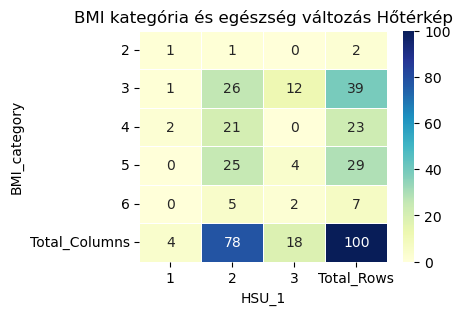

In [28]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_HSU_1, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és egészség változás Hőtérkép')
plt.xlabel('HSU_1')
plt.ylabel('BMI_category')
plt.show()

In [29]:
# Kereszttábla
crosstab_HSU_2= pd.crosstab(df['BMI_category'], df['HSU_2'])
#print(crosstab_FEOR)

crosstab_HSU_2['Total_Rows'] = crosstab_HSU_2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_HSU_2.loc['Total_Columns'] = crosstab_HSU_2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_HSU_2)


Oszlopok és sorok összegével bővített tábla:
HSU_2          -9  -8   1   2   3  4  Total_Rows
BMI_category                                    
2               0   0   1   1   0  0           2
3               0   1   8  24   5  1          39
4               0   0   6  15   2  0          23
5               0   0   5  17   7  0          29
6               1   0   2   3   1  0           7
Total_Columns   1   1  22  60  15  1         100


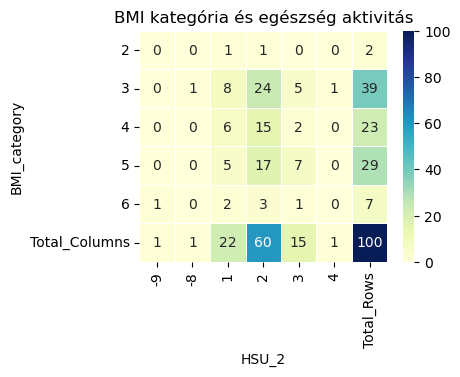

In [30]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_HSU_2, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és egészség aktivitás')
plt.xlabel('HSU_2')
plt.ylabel('BMI_category')
plt.show()

In [31]:
# Kereszttábla
crosstab_HS2= pd.crosstab(df['BMI_category'], df['HS2'])
#print(crosstab_FEOR)

crosstab_HS2['Total_Rows'] = crosstab_HS2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_HS2.loc['Total_Columns'] = crosstab_HS2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_HS2)


Oszlopok és sorok összegével bővített tábla:
HS2            -9  -8   1   2  Total_Rows
BMI_category                             
2               0   0   0   2           2
3               0   1  23  15          39
4               0   0  13  10          23
5               1   0  14  14          29
6               0   0   2   5           7
Total_Columns   1   1  52  46         100


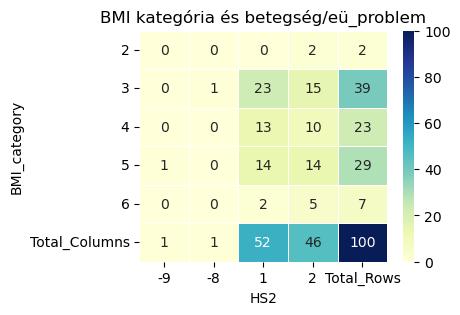

In [33]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_HS2, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória és betegség/eü_problem')
plt.xlabel('HS2')
plt.ylabel('BMI_category')
plt.show()

HS1	Milyen az Ön egészsége általában?

In [34]:
# Kereszttábla
crosstab_HS1= pd.crosstab(df['BMI_category'], df['HS1'])
#print(crosstab_FEOR)

crosstab_HS1['Total_Rows'] = crosstab_HS1.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_HS1.loc['Total_Columns'] = crosstab_HS1.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_HS1)


Oszlopok és sorok összegével bővített tábla:
HS1            -9  -8   1   2   3  4  5  Total_Rows
BMI_category                                       
2               0   0   1   1   0  0  0           2
3               0   0   7  10  18  3  1          39
4               0   0   6   9   6  2  0          23
5               1   1   5  14   8  0  0          29
6               0   0   0   4   3  0  0           7
Total_Columns   1   1  19  38  35  5  1         100


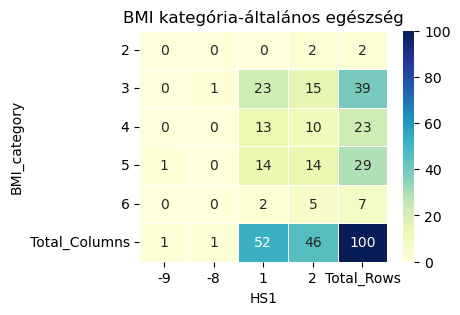

In [35]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_HS2, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-általános egészség')
plt.xlabel('HS1')
plt.ylabel('BMI_category')
plt.show()

In [36]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_HS1)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 18.89300103315276
P-érték: 0.9879634413205001


In [49]:
#crosstab_10 = crosstab_10.to_excel("eg_anyagi_regio_BMI.xlsx")

In [ ]:
# Kereszttábla
crosstab_HS1= pd.crosstab(df['BMI_category'], df['HS1'])


#### Orvos által megállapított betegségek és a BMI kategória kapcsolata

- ORVOS_BETEGSEG_KRONIKUS	Krónikus betegség - orvos megállapította-e
- ORVOS_BETEGSEG_SZIVB	Szívbetegség - orvos megállapította-e
- ORVOS_BETEGSEG_MOZGASSZ	Mozgásszervi betegség - orvos megállapította-e
- ORVOS_BETEGSEG_MENTALIS_VISELK	Mentális betegség vagy viselkedészavar - orvos megállapította-e
- ORVOS_BETEGSEG_HANGULATZAVAR	Hangulatzavar - orvos megállapította-e
- ORVOS_BETEGSEG_EGYEB_MENTALIS	A depresszión kívül egyéb mentális betegség vagy viselkedészavar - orvos megállapította-e


In [52]:
df['ORVOS_BETEGSEG_KRONIKUS'].isnull().sum()

0

In [50]:
# Kereszttábla
crosstab_ORV1= pd.crosstab(df['BMI_category'], df['ORVOS_BETEGSEG_KRONIKUS'])
#print(crosstab_FEOR)

crosstab_ORV1['Total_Rows'] = crosstab_ORV1.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_ORV1.loc['Total_Columns'] = crosstab_ORV1.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_ORV1)


Oszlopok és sorok összegével bővített tábla:
ORVOS_BETEGSEG_KRONIKUS   1  2   4  Total_Rows
BMI_category                                  
2                         1  0   1           2
3                        25  2  12          39
4                        16  1   6          23
5                        18  1  10          29
6                         5  1   1           7
Total_Columns            65  5  30         100


In [53]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_ORV1)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 2.8604822694316416
P-érték: 0.9997011066719669


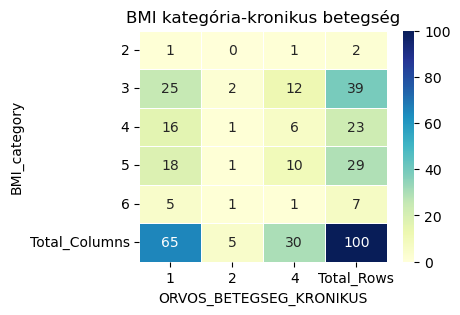

In [56]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_ORV1, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-kronikus betegség')
plt.xlabel('ORVOS_BETEGSEG_KRONIKUS')
plt.ylabel('BMI_category')
plt.show()

In [57]:
df['ORVOS_BETEGSEG_SZIVB'].isnull().sum()

3

In [58]:
# Kereszttábla
crosstab_ORV2= pd.crosstab(df['BMI_category'], df['ORVOS_BETEGSEG_SZIVB'])
#print(crosstab_FEOR)

crosstab_ORV2['Total_Rows'] = crosstab_ORV2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_ORV2.loc['Total_Columns'] = crosstab_ORV2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_ORV2)


Oszlopok és sorok összegével bővített tábla:
ORVOS_BETEGSEG_SZIVB  1.0  2.0  4.0  Total_Rows
BMI_category                                   
2                       0    0    2           2
3                       5    1   33          39
4                       3    0   19          22
5                       3    0   24          27
6                       4    0    3           7
Total_Columns          15    1   81          97


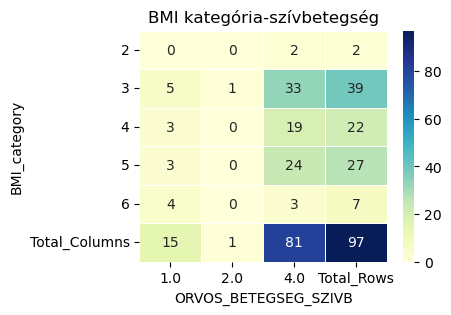

In [59]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_ORV2, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-szívbetegség')
plt.xlabel('ORVOS_BETEGSEG_SZIVB')
plt.ylabel('BMI_category')
plt.show()

In [60]:
df['ORVOS_BETEGSEG_MOZGASSZ'].isnull().sum()

3

In [61]:
# Kereszttábla
crosstab_ORV3= pd.crosstab(df['BMI_category'], df['ORVOS_BETEGSEG_MOZGASSZ'])
#print(crosstab_FEOR)

crosstab_ORV3['Total_Rows'] = crosstab_ORV3.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_ORV3.loc['Total_Columns'] = crosstab_ORV3.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_ORV3)


Oszlopok és sorok összegével bővített tábla:
ORVOS_BETEGSEG_MOZGASSZ  1.0  2.0  4.0  Total_Rows
BMI_category                                      
2                          0    0    2           2
3                         16    5   17          38
4                          8    2   12          22
5                          6    2   20          28
6                          2    2    3           7
Total_Columns             32   11   54          97


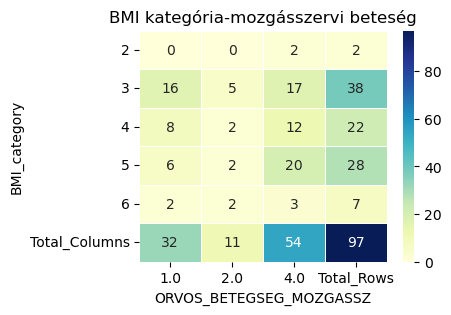

In [62]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_ORV3, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-mozgásszervi beteség')
plt.xlabel('ORVOS_BETEGSEG_MOZGASSZ')
plt.ylabel('BMI_category')
plt.show()

In [63]:
from scipy.stats import chi2_contingency

# Chi-négyzet teszt
chi2, p, dof, expected = chi2_contingency(crosstab_ORV3)

print(f"Chi-négyzet statisztika: {chi2}")
print(f"P-érték: {p}")

Chi-négyzet statisztika: 8.554515089951693
P-érték: 0.899635932321881


In [66]:
# Kereszttábla
crosstab_ORV4= pd.crosstab(df['BMI_category'], df['ORVOS_BETEGSEG_EGYEB_MENTALIS'])
#print(crosstab_FEOR)

crosstab_ORV4['Total_Rows'] = crosstab_ORV4.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_ORV4.loc['Total_Columns'] = crosstab_ORV4.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_ORV4)


Oszlopok és sorok összegével bővített tábla:
ORVOS_BETEGSEG_EGYEB_MENTALIS  1  2   4  Total_Rows
BMI_category                                       
2                              0  0   2           2
3                              1  1  37          39
4                              0  0  23          23
5                              0  0  29          29
6                              0  0   7           7
Total_Columns                  1  1  98         100


In [73]:
# Kereszttábla
crosstab_UN= pd.crosstab(df['BMI_category'], df['UN1B'])
#print(crosstab_FEOR)

crosstab_UN['Total_Rows'] = crosstab_UN.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_UN.loc['Total_Columns'] = crosstab_UN.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_UN)


Oszlopok és sorok összegével bővített tábla:
UN1B           -8  1   2  3  Total_Rows
BMI_category                           
2               0  0   2  0           2
3               0  1  37  1          39
4               1  1  19  2          23
5               0  2  25  2          29
6               1  0   6  0           7
Total_Columns   2  4  89  5         100


#### Élelmiszerfogyasztás és a BMI kategória kapcsolata

- DH1 Milyen gyakran fogyaszt Ön friss, fagyasztott, szárított vagy konzerv gyümölcsöt?
-DH2 Hány adag gyümölcsöt eszik naponta?
- DH3 Milyen gyakran fogyaszt Ön friss, fagyasztott, szárított vagy konzerv zöldséget vagy salátát (burgonyát nem számítva)?
- DH4 Hány adag zöldséget, salátát eszik naponta (burgonyát nem számítva)?
- DH13A: Milyen gyakran fogyasztja Ön a következő húsfajtákat: vörös hús (pl. sertés, marha, borjú, bárány, vadhús)?
- DH13B: Milyen gyakran fogyasztja Ön a következő húsfajtákat: fehér hús (pl. csirke, pulyka, kacsa, liba, nyúl)?

DH1
1	naponta többször	
2	naponta egyszer	
3	hetente 4-6 alkalommal	
4	hetente 1-3 alkalommal	
5	ritkábban mint hetente egyszer	
6	soha	

DH3

1	naponta többször	
2	naponta egyszer	
3	hetente 4-6 alkalommal	
4	hetente 1-3 alkalommal	
5	ritkábban mint hetente egyszer	
6	soha

DH13A
1	naponta egyszer vagy többször		
2	hetente 4-6 alkalommal		
3	hetente 2-3 alkalommal		
4	hetente 1alkalommal		
5	ritkábban mint hetente egyszer		
6	soha		



DH1 Milyen gyakran fogyaszt Ön friss, fagyasztott, szárított vagy konzerv gyümölcsöt?

In [74]:
# Kereszttábla
crosstab_DH1= pd.crosstab(df['BMI_category'], df['DH1'])
#print(crosstab_FEOR)

crosstab_DH1['Total_Rows'] = crosstab_DH1.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH1.loc['Total_Columns'] = crosstab_DH1.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH1)


Oszlopok és sorok összegével bővített tábla:
DH1            -8   1   2   3   4   5  Total_Rows
BMI_category                                     
2               0   1   1   0   0   0           2
3               0   7  17   3   9   3          39
4               1   3   6   4   4   5          23
5               0  11  10   4   2   2          29
6               0   1   5   1   0   0           7
Total_Columns   1  23  39  12  15  10         100


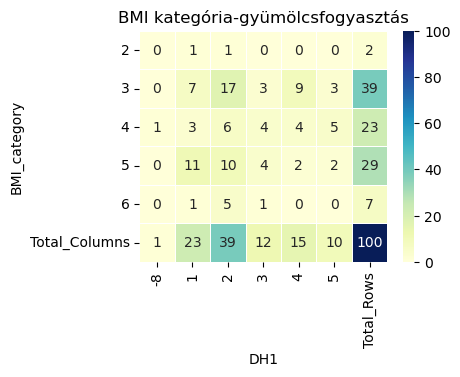

In [77]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH1, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-gyümölcsfogyasztás')
plt.xlabel('DH1')
plt.ylabel('BMI_category')
plt.show()

DH2 Hány adag gyümölcsöt eszik naponta?

In [75]:
# Kereszttábla
crosstab_DH2= pd.crosstab(df['BMI_category'], df['DH2'])
#print(crosstab_FEOR)

crosstab_DH2['Total_Rows'] = crosstab_DH2.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH2.loc['Total_Columns'] = crosstab_DH2.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH2)


Oszlopok és sorok összegével bővített tábla:
DH2            -8.0   1.0   2.0   3.0   5.0   Total_Rows
BMI_category                                            
2                 0     1     0     0     0            1
3                 1    12    10     4     0           27
4                 0     6     6     2     0           14
5                 0     8     8     1     1           18
6                 0     2     1     2     0            5
Total_Columns     1    29    25     9     1           65


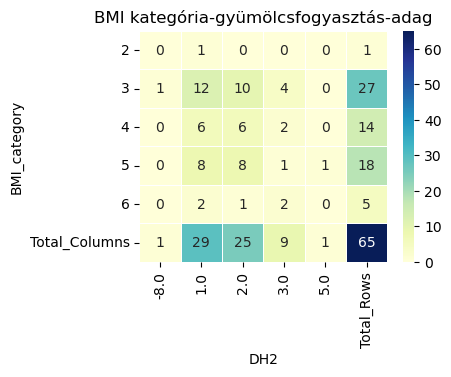

In [82]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH2, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-gyümölcsfogyasztás-adag')
plt.xlabel('DH2')
plt.ylabel('BMI_category')
plt.show()

DH3 Milyen gyakran fogyaszt Ön friss, fagyasztott, szárított vagy konzerv zöldséget vagy salátát (burgonyát nem számítva)?

In [79]:
# Kereszttábla
crosstab_DH3= pd.crosstab(df['BMI_category'], df['DH3'])
#print(crosstab_FEOR)

crosstab_DH3['Total_Rows'] = crosstab_DH3.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH3.loc['Total_Columns'] = crosstab_DH3.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH3)


Oszlopok és sorok összegével bővített tábla:
DH3             1   2   3   4  5  6  Total_Rows
BMI_category                                   
2               1   0   0   1  0  0           2
3               5  10   7  12  5  0          39
4               3   4   4  10  2  0          23
5               6  10   6   4  2  1          29
6               1   0   5   1  0  0           7
Total_Columns  16  24  22  28  9  1         100


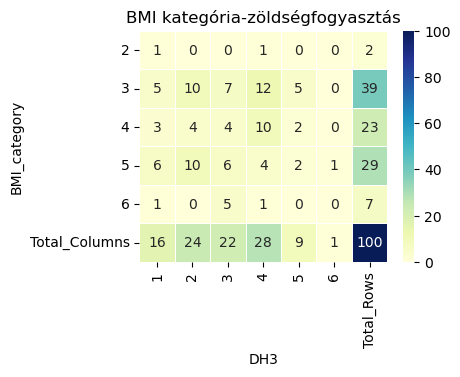

In [80]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH3, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-zöldségfogyasztás')
plt.xlabel('DH3')
plt.ylabel('BMI_category')
plt.show()

DH4 Hány adag zöldséget, salátát eszik naponta (burgonyát nem számítva)?

In [83]:
# Kereszttábla
crosstab_DH4= pd.crosstab(df['BMI_category'], df['DH4'])
#print(crosstab_FEOR)

crosstab_DH4['Total_Rows'] = crosstab_DH4.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH4.loc['Total_Columns'] = crosstab_DH4.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH4)


Oszlopok és sorok összegével bővített tábla:
DH4            1.0  2.0  3.0  5.0  Total_Rows
BMI_category                                 
2                1    0    0    0           1
3               10    4    2    0          16
4                9    1    0    0          10
5                7    4    1    0          12
6                1    1    1    1           4
Total_Columns   28   10    4    1          43


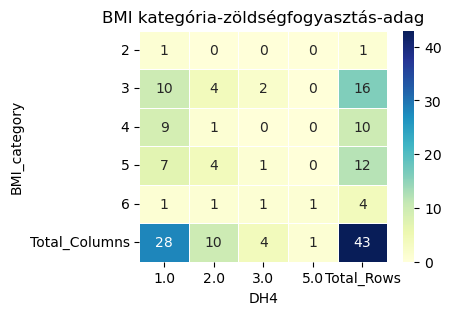

In [89]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH4, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-zöldségfogyasztás-adag')
plt.xlabel('DH4')
plt.ylabel('BMI_category')
plt.show()

DH13A: Milyen gyakran fogyasztja Ön a következő húsfajtákat: vörös hús (pl. sertés, marha, borjú, bárány, vadhús)?

In [85]:
# Kereszttábla
crosstab_DH13A= pd.crosstab(df['BMI_category'], df['DH13A'])
#print(crosstab_FEOR)

crosstab_DH13A['Total_Rows'] = crosstab_DH13A.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH13A.loc['Total_Columns'] = crosstab_DH13A.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH13A)


Oszlopok és sorok összegével bővített tábla:
DH13A          1  2   3   4   5  6  Total_Rows
BMI_category                                  
2              0  1   1   0   0  0           2
3              3  0  15  10  10  1          39
4              0  3  13   4   3  0          23
5              1  1  12   8   5  2          29
6              0  0   2   2   3  0           7
Total_Columns  4  5  43  24  21  3         100


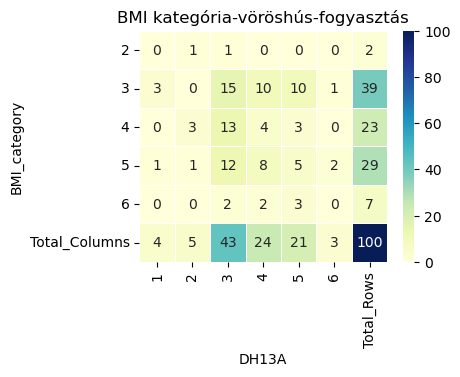

In [90]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH13A, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-vöröshús-fogyasztás')
plt.xlabel('DH13A')
plt.ylabel('BMI_category')
plt.show()

DH13B: Milyen gyakran fogyasztja Ön a következő húsfajtákat: fehér hús (pl. csirke, pulyka, kacsa, liba, nyúl)?

In [87]:
# Kereszttábla
crosstab_DH13B= pd.crosstab(df['BMI_category'], df['DH13B'])
#print(crosstab_FEOR)

crosstab_DH13B['Total_Rows'] = crosstab_DH13B.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH13B.loc['Total_Columns'] = crosstab_DH13B.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH13B)


Oszlopok és sorok összegével bővített tábla:
DH13B          -9  1   2   3   4  5  Total_Rows
BMI_category                                   
2               0  0   2   0   0  0           2
3               1  3   4  18  11  2          39
4               0  1   3  14   5  0          23
5               1  1   5  16   5  1          29
6               0  0   1   6   0  0           7
Total_Columns   2  5  15  54  21  3         100


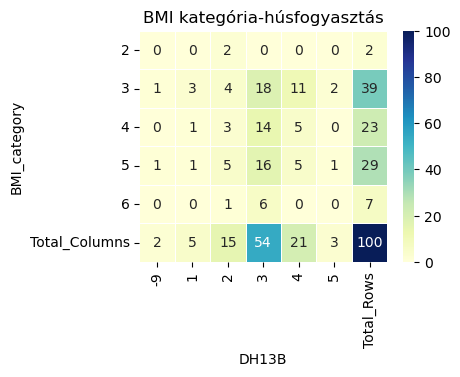

In [91]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH13B, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-húsfogyasztás')
plt.xlabel('DH13B')
plt.ylabel('BMI_category')
plt.show()

DH13C:Milyen gyakran fogyasztja Ön a következő húsfajtákat: feldolgozott húskészítmények (pl. szalámi, felvágott, szalonna, sonka, kolbász, virsli, májkrém)?

In [9]:
# Kereszttábla
crosstab_DH13C= pd.crosstab(df['BMI_category'], df['DH13C'])
#print(crosstab_FEOR)

crosstab_DH13C['Total_Rows'] = crosstab_DH13C.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH13C.loc['Total_Columns'] = crosstab_DH13C.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH13C)


Oszlopok és sorok összegével bővített tábla:
DH13C          -9   1   2   3   4  5  6  Total_Rows
BMI_category                                       
2               0   0   0   2   0  0  0           2
3               0  17   8   7   4  2  1          39
4               0  10   5   2   4  2  0          23
5               1  12   6   5   3  1  1          29
6               0   2   2   2   1  0  0           7
Total_Columns   1  41  21  18  12  5  2         100


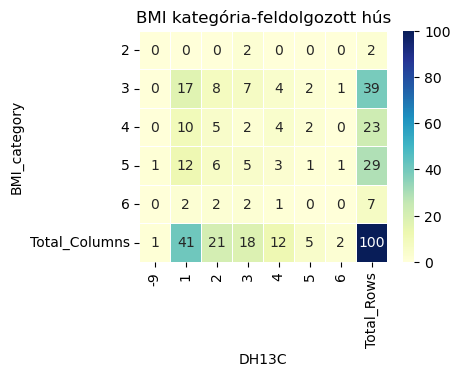

In [11]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH13C, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-feldolgozott hús')
plt.xlabel('DH13C')
plt.ylabel('BMI_category')
plt.show()

DH13D: Milyen gyakran fogyasztja Ön a következő húsfajtákat: hal vagy tenger gyümölcsei?

In [12]:
# Kereszttábla
crosstab_DH13D= pd.crosstab(df['BMI_category'], df['DH13D'])
#print(crosstab_FEOR)

crosstab_DH13D['Total_Rows'] = crosstab_DH13D.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH13D.loc['Total_Columns'] = crosstab_DH13D.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH13D)


Oszlopok és sorok összegével bővített tábla:
DH13D          -9  1  2  3   4   5   6  Total_Rows
BMI_category                                      
2               0  0  0  0   0   2   0           2
3               1  0  0  4   9  19   6          39
4               0  1  0  0   4  13   5          23
5               0  0  1  0   6  17   5          29
6               0  0  1  0   0   6   0           7
Total_Columns   1  1  2  4  19  57  16         100


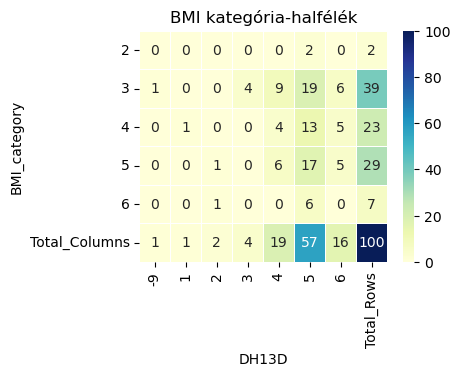

In [13]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH13D, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-halfélék')
plt.xlabel('DH13D')
plt.ylabel('BMI_category')
plt.show()

DH14: Milyen gyakran fogyaszt Ön tejet és tejterméket (pl. tejes italokat, kefirt, joghurtot, tejfölt, túrót, vajat, sajtot)?

In [14]:
# Kereszttábla
crosstab_DH14= pd.crosstab(df['BMI_category'], df['DH14'])
#print(crosstab_FEOR)

crosstab_DH14['Total_Rows'] = crosstab_DH14.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_DH14.loc['Total_Columns'] = crosstab_DH14.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_DH14)


Oszlopok és sorok összegével bővített tábla:
DH14           -9   1   2   3  4  5  6  Total_Rows
BMI_category                                      
2               0   1   1   0  0  0  0           2
3               0  19   5   7  2  4  2          39
4               0  13   4   5  0  1  0          23
5               1  15   3   6  1  1  2          29
6               0   5   0   0  0  1  1           7
Total_Columns   1  53  13  18  3  7  5         100


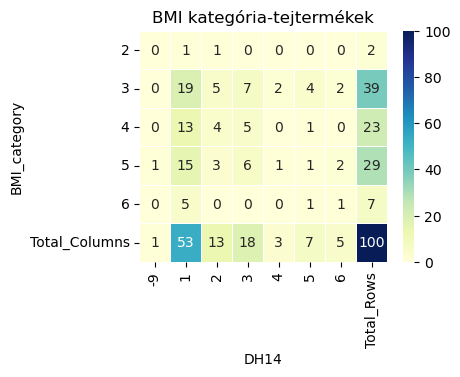

In [16]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_DH14, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-tejtermékek')
plt.xlabel('DH14')
plt.ylabel('BMI_category')
plt.show()

#### Fizikai aktivitás és a BMI kategória kapcsolata

PE3: Egy átlagos napon mennyi időt gyalogol azért, hogy egyik helyről a másikra jusson?
- 1: 10-29 perc
- 2: 30-59 perc
- 3: 1 és 2 óra között
- 4: 2 é 3 óra között
- 5: 3 óránál többet

In [5]:
# Kereszttábla
crosstab_PE3= pd.crosstab(df['BMI_category'], df['PE3'])
#print(crosstab_FEOR)

crosstab_PE3['Total_Rows'] = crosstab_PE3.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_PE3.loc['Total_Columns'] = crosstab_PE3.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_PE3)


Oszlopok és sorok összegével bővített tábla:
PE3            -8.0   1.0   2.0   3.0   4.0   5.0   Total_Rows
BMI_category                                                  
2                 0     0     1     0     0     0            1
3                 0    11    10     2     3     2           28
4                 1     8     7     2     1     1           20
5                 1    16     4     0     1     2           24
6                 0     4     0     0     2     0            6
Total_Columns     2    39    22     4     7     5           79


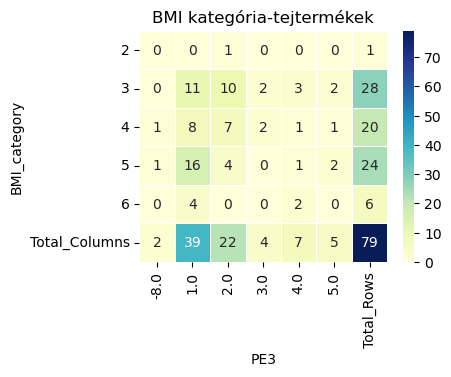

In [6]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_PE3, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)

plt.title('BMI kategória-napi gyaloglás')
plt.xlabel('PE3')
plt.ylabel('BMI_category')
plt.show()

PE4: egy átlagos héten hány napon fordul elő, hogy folyamatosan legalább 10 percet kerékpározik, azért hogy egyik helyről a másikra jusson

In [7]:
# Kereszttábla
crosstab_PE4= pd.crosstab(df['BMI_category'], df['PE4'])
#print(crosstab_FEOR)

crosstab_PE4['Total_Rows'] = crosstab_PE4.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_PE4.loc['Total_Columns'] = crosstab_PE4.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_PE4)


Oszlopok és sorok összegével bővített tábla:
PE4            -8   0  1  2  3  5  6  7  Total_Rows
BMI_category                                       
2               0   1  0  0  0  0  1  0           2
3               1  23  2  2  2  5  0  4          39
4               1  15  0  1  3  1  0  2          23
5               0  20  2  2  2  1  0  2          29
6               1   4  1  0  0  1  0  0           7
Total_Columns   3  63  5  5  7  8  1  8         100


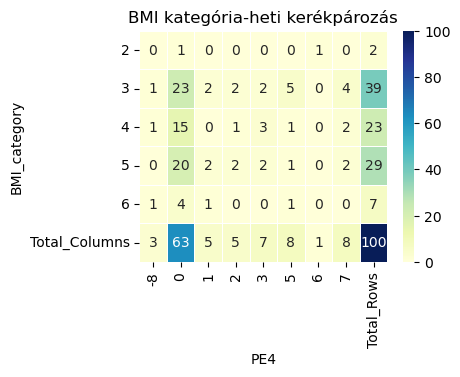

In [8]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_PE4, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)
plt.title('BMI kategória-heti kerékpározás')
plt.xlabel('PE4')
plt.ylabel('BMI_category')
plt.show()

PE5: egy átlagos NAPON mennyi időt kerékpározik, azért hogy egyik helyről a másikra jusson?

In [9]:
# Kereszttábla
crosstab_PE5= pd.crosstab(df['BMI_category'], df['PE5'])
#print(crosstab_FEOR)

crosstab_PE5['Total_Rows'] = crosstab_PE5.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_PE5.loc['Total_Columns'] = crosstab_PE5.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_PE5)


Oszlopok és sorok összegével bővített tábla:
PE5            1.0  2.0  3.0  4.0  Total_Rows
BMI_category                                 
2                1    0    0    1           2
3                8    6    1    0          15
4                3    2    0    1           6
5                4    0    0    0           4
6                2    1    0    0           3
Total_Columns   18    9    1    2          30


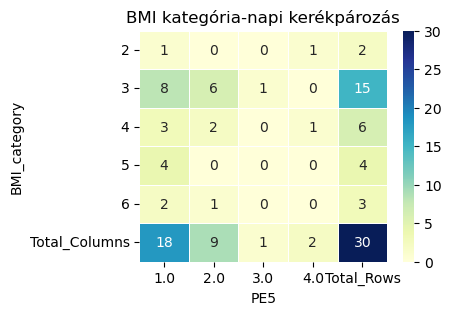

In [10]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_PE5, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)
plt.title('BMI kategória-napi kerékpározás')
plt.xlabel('PE5')
plt.ylabel('BMI_category')
plt.show()

WALKP: gyaloglás(hetente legalább 10 perc)

- 0: nem gyalogol
- 1: gyalogol


In [11]:
# Kereszttábla
crosstab_WALKP= pd.crosstab(df['BMI_category'], df['WALKP'])
#print(crosstab_FEOR)

crosstab_WALKP['Total_Rows'] = crosstab_WALKP.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_WALKP.loc['Total_Columns'] = crosstab_WALKP.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_WALKP)


Oszlopok és sorok összegével bővített tábla:
WALKP          -1   0   1  Total_Rows
BMI_category                         
2               0   0   2           2
3               2   5  32          39
4               0   2  21          23
5               0   3  26          29
6               0   0   7           7
Total_Columns   2  10  88         100


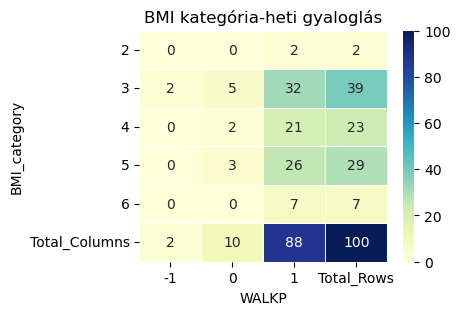

In [12]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_WALKP, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)
plt.title('BMI kategória-heti gyaloglás')
plt.xlabel('WALKP')
plt.ylabel('BMI_category')
plt.show()

BICP: kerékpározás(hetente legalább 10 perc)

- 0: nem kerékpározik
- 1: kerékpározik 

In [14]:
# Kereszttábla
crosstab_BICP= pd.crosstab(df['BMI_category'], df['BICP'])
#print(crosstab_FEOR)

crosstab_BICP['Total_Rows'] = crosstab_BICP.sum(axis=1)

# Oszlopok összegzésének hozzáadása
crosstab_BICP.loc['Total_Columns'] = crosstab_BICP.sum(axis=0)

print("\nOszlopok és sorok összegével bővített tábla:")
print(crosstab_BICP)


Oszlopok és sorok összegével bővített tábla:
BICP           -1   0   1  Total_Rows
BMI_category                         
2               0   2   0           2
3               1  20  18          39
4               0  15   8          23
5               1  18  10          29
6               0   7   0           7
Total_Columns   2  62  36         100


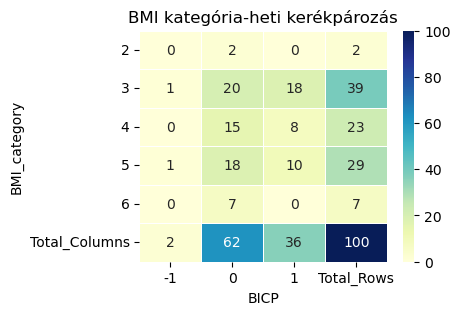

In [16]:
# Hőtérkép készítése a keresztelt táblából
plt.figure(figsize=(4, 3))
sns.heatmap(crosstab_BICP, annot=True, cmap="YlGnBu", fmt="d", linewidths=0.5)
plt.title('BMI kategória-heti kerékpározás')
plt.xlabel('BICP')
plt.ylabel('BMI_category')
plt.show()

In [9]:
#!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [ ]:
FEOR_CODED: A válaszadó foglalkozása (FEOR-kód), amely a válaszadó munkaerőpiaci helyzetét jellemzi.
HATLEVEL_EU: A válaszadó legmagasabb befejezett iskolai végzettsége az EU szabványok szerint.
HH_6_KITOLTO: A válaszadó legmagasabb befejezett iskolai végzettsége, amely az adatkitöltő szintjén szerepelhet.
MAINSTAT_EU: A válaszadó gazdasági aktivitása (pl. munkavállaló, munkanélküli, stb.).
HH_7_KITOLTO: A válaszadó gazdasági aktivitása, amelyet az adatkitöltő szintjén rögzítenek.
FT_PT_EU: A válaszadó főállású munkavállalóként teljes vagy részmunkaidőben dolgozik-e.
JOBSTAT: A válaszadó foglalkozási státusza főállásban (pl. alkalmazott, vezető, stb.).
Elemzés célja:
A célunk, hogy felmérjük, hogyan befolyásolják az egyes magyarázó változók a BMI értékét, és hogyan korrelálnak a BMI-vel. Mivel



In [ ]:
BMI és REGIO_KOD: Az életkörülmények, a környezeti tényezők és a táplálkozási szokások is területi különbségeket mutathatnak. A Kendal tau segítségével felmérhetjük, hogy van-e kapcsolat a BMI és a regionális kódok között.
BMI és FEOR: A foglalkozás típusa (pl. szellemi munka vs. fizikai munka) hatással lehet a BMI-re, mivel különböző foglalkozások eltérő fizikai aktivitást és táplálkozási szokásokat eredményezhetnek.
BMI és iskolai végzettség (ISK4_KITOLTO, HATLEVEL_EU, HH_6_KITOLTO): Az iskolai végzettség hatással lehet az egészségi állapotra, mivel a magasabb iskolai végzettséggel rendelkező személyek hajlamosabbak lehetnek tudatosabb életmódbeli döntésekre.
BMI és gazdasági aktivitás (MAINSTAT_EU, HH_7_KITOLTO): A gazdasági aktivitás (pl. munkavállaló vagy munkanélküli) összefüggésben állhat a fizikai aktivitással és az életmódbeli szokásokkal, amelyek hatással vannak a BMI-re.
BMI és munkaidő (FT_PT_EU): A teljes vagy részmunkaidős foglalkoztatás hatással lehet a mindennapi rutinra, így az étkezési és mozgási szokásokra, amelyek befolyásolják a BMI-t.
BMI és foglalkozási státusz (JOBSTAT): A munkahelyi státusz (pl. alkalmazott vagy vezető) is befolyásolhatja a stressz szintet, a munkahelyi étkezési szokásokat és a fizikai aktivitást, amelyek a BMI-t is érinthetik.


In [ ]:
ASSZOCIÁCIOK

In [ ]:
Az asszociációknál tisztítsam le a teljes adatbázist arra ami kell

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Adatok betöltése - Itt cseréld ki a saját adatfájlodra
df = pd.read_excel('BMI_megye_clean.xlsx')

# A kiválasztott változók
variables = ['REGIO_KOD', 'FEOR_CODED', 'ISK4_KITOLTO', 'HATLEVEL_EU', 
             'HH_6_KITOLTO', 'MAINSTAT_EU', 'HH_7_KITOLTO', 'FT_PT_EU', 'JOBSTAT_EU']

# Az adatokat kiválasztjuk
df_selected = df[variables]

# Kategorikus változók binarizálása
# Minden kategóriát bináris értékké alakítunk, pl. az 'ISK4_KITOLTO' változó 1-es vagy 0-s értékké alakul
df_binarized = df_selected.apply(lambda x: x.astype('category').cat.codes if x.dtypes == 'O' else x)

# Győződj meg arról, hogy minden érték 0 vagy 1
df_binarized = df_binarized.applymap(lambda x: 1 if x > 0 else 0)

# Frequent itemsets keresése (Apriori algoritmus)
frequent_itemsets = apriori(df_binarized, min_support=0.05, use_colnames=True)

# Asszociációs szabályok generálása
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Eredmények megjelenítése
print(rules)

# Eredményeket táblázat formájában is kiírhatjuk, hogy jobban áttekinthetőek legyenek
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)


          antecedents                                        consequents  \
0         (REGIO_KOD)                                       (FEOR_CODED)   
1        (FEOR_CODED)                                        (REGIO_KOD)   
2         (REGIO_KOD)                                     (ISK4_KITOLTO)   
3      (ISK4_KITOLTO)                                        (REGIO_KOD)   
4         (REGIO_KOD)                                      (HATLEVEL_EU)   
...               ...                                                ...   
12823  (HH_6_KITOLTO)  (FEOR_CODED, FT_PT_EU, HATLEVEL_EU, HH_7_KITOL...   
12824     (REGIO_KOD)  (FEOR_CODED, FT_PT_EU, HATLEVEL_EU, HH_7_KITOL...   
12825    (JOBSTAT_EU)  (FEOR_CODED, FT_PT_EU, HATLEVEL_EU, HH_7_KITOL...   
12826   (MAINSTAT_EU)  (FEOR_CODED, FT_PT_EU, HATLEVEL_EU, HH_7_KITOL...   
12827  (ISK4_KITOLTO)  (FEOR_CODED, FT_PT_EU, HATLEVEL_EU, HH_7_KITOL...   

       antecedent support  consequent support  support  confidence      lift  \
0      

C:\Users\erika\AppData\Local\Temp\ipykernel_14876\3751265163.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binarized = df_binarized.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\erika\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\erika\anaconda3\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
8728,"(HH_6_KITOLTO, REGIO_KOD, FEOR_CODED, FT_PT_EU)","(JOBSTAT_EU, HH_7_KITOLTO, ISK4_KITOLTO)",0.17,0.404762,1.124339
10696,"(HH_6_KITOLTO, FEOR_CODED, FT_PT_EU)","(HATLEVEL_EU, MAINSTAT_EU, JOBSTAT_EU, HH_7_KI...",0.17,0.404762,1.124339
3523,"(HH_6_KITOLTO, FEOR_CODED, FT_PT_EU, ISK4_KITO...",(JOBSTAT_EU),0.17,0.404762,1.124339
9111,"(HH_6_KITOLTO, REGIO_KOD, FEOR_CODED, FT_PT_EU)","(HATLEVEL_EU, JOBSTAT_EU, HH_7_KITOLTO)",0.17,0.404762,1.124339
5183,"(FEOR_CODED, HATLEVEL_EU, HH_6_KITOLTO, REGIO_...",(JOBSTAT_EU),0.17,0.404762,1.124339
...,...,...,...,...,...
4564,"(MAINSTAT_EU, FEOR_CODED)","(HH_7_KITOLTO, REGIO_KOD, HATLEVEL_EU, ISK4_KI...",0.93,1.000000,1.000000
4565,"(FEOR_CODED, ISK4_KITOLTO)","(MAINSTAT_EU, HH_7_KITOLTO, REGIO_KOD, HATLEVE...",0.93,1.000000,1.000000
4566,"(HH_7_KITOLTO, HATLEVEL_EU)","(MAINSTAT_EU, REGIO_KOD, FEOR_CODED, ISK4_KITO...",0.93,0.930000,1.000000
4567,"(REGIO_KOD, HATLEVEL_EU)","(MAINSTAT_EU, FEOR_CODED, HH_7_KITOLTO, ISK4_K...",0.93,0.930000,1.000000


In [10]:
rules.to_excel('association_rules2.xlsx', index=False)

print("A szabályok sikeresen kiíródtak az Excel fájlba!")

C:\Users\erika\AppData\Local\Temp\ipykernel_14876\1722209567.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  rules.to_excel('association_rules2.xlsx', index=False)


A szabályok sikeresen kiíródtak az Excel fájlba!


In [ ]:
Kód magyarázata:
Adatok előkészítése:

Az df_selected változóban a fent említett változókat választjuk ki a DataFrame-ből.
A pd.get_dummies() függvénnyel bináris formátumba alakítjuk őket (kategorizált változók esetén), hogy az Apriori algoritmus számára megfelelő formátumot biztosítsunk.
Apriori algoritmus alkalmazása:

Az apriori() függvényt alkalmazzuk a binarizált adatokra, ahol a min_support paraméter határozza meg a minimális támogatottsági küszöböt.
A use_colnames=True biztosítja, hogy az egyes gyakori itemsetek nevei is megjelenjenek az eredményekben.
Asszociációs szabályok generálása:

Az association_rules() függvény a generált gyakori itemsetekből asszociációs szabályokat hoz létre a lift alapján, ahol a min_threshold=1.0 azt jelzi, hogy csak azokat a szabályokat szeretnénk, ahol a lift értéke nagyobb vagy egyenlő 1.0-nál.
Eredmények megjelenítése:

A antecedents (előzmény) és consequents (következmények) oszlopokban található asszociációs szabályokat rendezhetjük a lift értéke alapján, hogy megértsük, mely szabályok erősebbek.
Kimeneti oszlopok magyarázata:
Antecedents: A szabály bal oldala, amelyben az adott változó(k) előfordulása van (pl. REGIO_KOD=1).
Consequents: A szabály jobb oldala, amely az előrejelzett kimenetet tartalmazza (pl. BMI=High).
Support: A szabály előfordulásának gyakorisága a teljes adatállományban.
Confidence: A szabály megbízhatósága (ha az antecedens igaz, akkor milyen valószínűséggel igaz a consequens is).
Lift: A szabály hatásának mértéke, amely azt mutatja, hogy a két elem együttes előfordulásának esélye mennyivel magasabb, mint ha véletlenszerűen történne meg.
Finomítás:
A min_support értéket a saját adataidhoz igazíthatod, hogy a gyakoribb vagy ritkább szabályokat célozd meg.
A min_threshold paraméter segítségével a lift értékének korlátozásával erősebb szabályokat kereshetsz.

In [ ]:
Binarizálás:
Kategorikus változók binarizálása: Azokat a változókat, amelyek nem 0-1 formátumban vannak, először átalakítjuk bináris formátumba.

Általános megoldás:

Ha a változók kategorizáltak (pl. 1, 2, 3 vagy más számok), akkor azokat bináris (0 vagy 1) értékekre kell alakítani.
Ha numerikusak, akkor a lehetséges kategóriák alapján binarizálhatók.

A apply(lambda x: x.astype('category').cat.codes if x.dtypes == 'O' else x) kódrészlet a kategorikus adatokat (azokat, amelyek nem numerikusak) átalakítja számokká, például az A, B, C értékeket 0, 1, 2-re.
Az applymap(lambda x: 1 if x > 0 else 0) sor minden változót 0-1 értékekre konvertál, hogy az Apriori algoritmus megfelelően dolgozhasson a bemeneti adatokkal.
Bináris adatok biztosítása: Az adatokban csak 0 és 1 értékek maradnak, így biztosítható, hogy az Apriori algoritmus megfelelően működjön.

In [ ]:
Az asszociációs szabályok eredményeit többféle tényező alapján érdemes értelmezni. Az általad említett táblázatban a következő oszlopok szerepelnek:

Antecedents (Előzmények): Azok a változók (vagy változóértékek), amelyek teljesülése esetén az consequents változók is teljesülnek.
Consequents (Következmények): Azok a változók, amelyek előrejelzése a antecedents teljesülése esetén valószínű. Ez a szabály jobb oldala.
Support (Támogatottság): A szabály által lefedett megfigyelések aránya az összes megfigyeléshez képest. Azaz, hogy a szabály hány esetben fordul elő a teljes adatállományban.
Confidence (Bizalom): A szabály megbízhatósága, azaz hogy a antecedents teljesülése esetén milyen valószínűséggel következik be a consequents. Minél magasabb a confidence, annál erősebb a szabály.
Lift (Emelkedés): Az asszociáció erősségét jelző mutató, amely azt mutatja, hogy a két elem együttes előfordulásának esélye milyen mértékben haladja meg a véletlen előfordulást. Ha a lift értéke 1, akkor a két elem független egymástól. Ha a lift értéke 1-nél nagyobb, akkor a két elem pozitívan asszociálódik egymással.
Példa eredmények értelmezése
1. sor
Antecedents: (HH_6_KITOLTO, HH_7_KITOLTO, FT_PT_EU, FEOR_CODED)
Consequents: (MAINSTAT_EU, JOBSTAT_EU)
Support: 0.17
Confidence: 0.404762
Lift: 1.124339

Értelmezés:

Az asszociációs szabály azt mondja, hogy ha a válaszadó a következő változókat teljesíti: HH_6_KITOLTO, HH_7_KITOLTO, FT_PT_EU, és FEOR_CODED, akkor 40,48%-os valószínűséggel fogják teljesíteni a MAINSTAT_EU és JOBSTAT_EU változókat.
A support 0.17 azt jelzi, hogy a szabály az összes megfigyelés 17%-ában előfordul.
A lift értéke 1.124339, ami azt jelenti, hogy a két változó (antecedens és consequent) együtt való előfordulásának esélye 12,4%-kal magasabb, mint ha véletlenszerűen történne.
2. sor
Antecedents: (HH_6_KITOLTO, HH_7_KITOLTO, FT_PT_EU, FEOR_CODED)
Consequents: (REGIO_KOD, JOBSTAT_EU, HATLEVEL_EU, ISK4_KITOLTO)
Support: 0.17
Confidence: 0.404762
Lift: 1.124339

Értelmezés:

Hasonlóan az előzőhöz, de itt a következő változók (antecedens) teljesülése esetén (pl. HH_6_KITOLTO, HH_7_KITOLTO, stb.) valószínű, hogy a REGIO_KOD, JOBSTAT_EU, HATLEVEL_EU, és ISK4_KITOLTO változók is teljesülnek.
A confidence itt is 40,48%, és a lift is 1.124339, tehát az asszociáció erőssége ugyanakkora.
3. sor
Antecedents: (FEOR_CODED, MAINSTAT_EU, ISK4_KITOLTO, REGIO_KOD)
Consequents: (JOBSTAT_EU, HH_7_KITOLTO, HATLEVEL_EU)
Support: 0.17
Confidence: 0.404762
Lift: 1.124339

Értelmezés:

Ez a szabály azt jelzi, hogy ha a válaszadó FEOR_CODED, MAINSTAT_EU, ISK4_KITOLTO, és REGIO_KOD értékekkel rendelkezik, akkor valószínű, hogy a JOBSTAT_EU, HH_7_KITOLTO, és HATLEVEL_EU is teljesül.
A confidence és a lift értékei szintén hasonlóak az előző szabályhoz.
Különleges esetek
4564-4567. sorok:
Antecedents: (REGIO_KOD, HH_7_KITOLTO)
Consequents: (MAINSTAT_EU, ISK4_KITOLTO, FEOR_CODED, HATLEVEL_EU)
Support: 0.93
Confidence: 0.930000
Lift: 1.000000

Értelmezés:

Ezek a szabályok nagyon erősek, mivel a support és confidence értékei is magasak (93%), ami azt jelenti, hogy ezen elemek közötti asszociáció az adatban nagyon gyakori.
A lift értéke 1.0, ami azt jelenti, hogy a két változó között nincs erősebb vagy gyengébb asszociáció, mint amit véletlenszerűen várnánk, de mégis 93%-os megbízhatóságú.
Általános megfigyelés:
A magas lift és confidence értékek arra utalnak, hogy ezek a szabályok jelentős asszociációt mutatnak az adatainkban.
Az alacsonyabb lift értékek (pl. 1.124339) azt jelentik, hogy a szabályok valószínűleg erősebbek, mint a véletlen előfordulás, de nem annyira erősek, mint azok, amelyeknél a lift értéke 1-nél nagyobb.
A support értékek (pl. 0.17, 0.93) megmutatják, hogy mekkora részét képezik a teljes adatállománynak azok az esetek, amelyek megfelelnek az adott szabályoknak.
Hogyan használhatók az eredmények?
A szabályokat felhasználhatod arra, hogy jobban megértsd, mely tényezők befolyásolják a másik tényező előfordulását.
A magas confidence és lift értékek azt jelzik, hogy érdemes figyelmet fordítani az ilyen szabályokra, mivel erős asszociációval rendelkeznek az adatban.






